In [1]:
import os
os.environ['J_NOTEBOOK'] = '1'

from preprocess.preprocess import *
import PARAMETERS
import sys
sys.path.append('./preprocess/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix
from pathlib import Path

%matplotlib inline


PARAMETERS.PREPROCESS_OPTIMIZATION = True

PARAMETERS.LBP_METHOD = 'riu'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False
PARAMETERS.DATASET = 'STARE'
PARAMETERS.FOLDS = 5

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,riu,get_pyramid_dataset,lanczos,False,5,True,True


In [2]:
import pandas as pd


df_train_list = []
df_test_list = []
y_train_list = []
y_test_list = []

for i_fold in range(PARAMETERS.FOLDS):

    df_train = pd.DataFrame()
    df_test = pd.DataFrame()

    for conf in ['_green_lbp_g']:

        df_train_riu = pd.read_pickle(f'../DB/{PARAMETERS.DATASET}/extra_features/fold_{i_fold}_of_{PARAMETERS.FOLDS}/preprocess_optimization{conf}/train_train_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
        df_test_riu = pd.read_pickle(f'../DB/{PARAMETERS.DATASET}/extra_features/fold_{i_fold}_of_{PARAMETERS.FOLDS}/preprocess_optimization{conf}/train_test_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

        df_train_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_train_riu.columns]
        df_test_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_test_riu.columns]

        if df_train.shape[0] == 0:
            y_train_list.append(df_train_riu['label'])
            y_test_list.append(df_test_riu['label'])
        df_train_riu = df_train_riu.drop(['label'], axis=1)
        df_test_riu = df_test_riu.drop(['label'], axis=1)


        df_train_var = pd.read_pickle(f'../DB/{PARAMETERS.DATASET}/extra_features/fold_{i_fold}_of_{PARAMETERS.FOLDS}/preprocess_optimization{conf}/train_train_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
        df_test_var = pd.read_pickle(f'../DB/{PARAMETERS.DATASET}/extra_features/fold_{i_fold}_of_{PARAMETERS.FOLDS}/preprocess_optimization{conf}/train_test_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

        df_train_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_train_var.columns]
        df_test_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_test_var.columns]

        df_train_var = df_train_var.drop(['Original', 'label'], axis=1)
        df_test_var = df_test_var.drop(['Original', 'label'], axis=1)

        df_train_temp = pd.concat([df_train_riu, df_train_var], axis=1)
        df_test_temp = pd.concat([df_test_riu, df_test_var], axis=1)
        df_train_temp.columns = [c + conf for c in df_train_temp.columns]
        df_test_temp.columns = [c + conf for c in df_test_temp.columns]

        if df_train.shape[0] > 0:
            df_train_temp.index = df_train.index
            df_test_temp.index = df_test.index
        df_train = pd.concat([df_train, df_train_temp], axis=1)
    df_test = pd.concat([df_test, df_test_temp], axis=1)
    
    df_train_list.append(df_train)
    df_test_list.append(df_test)
    print(i_fold)
    print(df_train.shape)
    
display(df_train)
display(df_test)

0
(4989295, 17)
1
(5019276, 17)
2
(5019932, 17)
3
(5015699, 17)
4
(5021746, 17)


,Original_green_lbp_g,1:1_riu_green_lbp_g,1:2_riu_green_lbp_g,1:4_riu_green_lbp_g,1:8_riu_green_lbp_g,2:1_1_riu_green_lbp_g,2:1_2_riu_green_lbp_g,2:1_3_riu_green_lbp_g,2:1_4_riu_green_lbp_g,1:1_var_green_lbp_g,1:2_var_green_lbp_g,1:4_var_green_lbp_g,1:8_var_green_lbp_g,2:1_1_var_green_lbp_g,2:1_2_var_green_lbp_g,2:1_3_var_green_lbp_g,2:1_4_var_green_lbp_g
0,3.0,16.0,4.0,8.0,8.0,34.0,34.0,8.0,8.0,148.225642,280.647236,1429.308260,2262.444786,14.133524,13.968771,145.760388,151.155400
1,3.0,8.0,16.0,8.0,8.0,35.0,35.0,16.0,16.0,186.477253,442.481270,1429.308260,2262.444786,11.190704,9.877048,146.892507,132.883967
2,3.0,8.0,16.0,8.0,8.0,27.0,27.0,8.0,8.0,220.740352,442.481270,1429.308260,2262.444786,11.558259,11.694454,120.798244,114.488858
3,3.0,4.0,16.0,4.0,8.0,18.0,27.0,4.0,8.0,242.892983,682.560127,1250.031575,2262.444786,14.908929,13.661982,116.072691,119.058806
4,3.0,8.0,16.0,4.0,8.0,27.0,35.0,16.0,16.0,237.273575,682.560127,1250.031575,2262.444786,14.558435,15.329121,132.484909,147.575539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340497,3.0,16.0,34.0,8.0,8.0,16.0,8.0,35.0,35.0,144.087423,364.408294,807.937648,685.136930,90.738153,99.187707,18.259436,16.518757
340498,3.0,8.0,25.0,8.0,16.0,8.0,16.0,34.0,34.0,136.840134,248.857591,785.990720,670.080207,101.353479,100.973963,12.207473,11.050183
340499,3.0,16.0,25.0,8.0,16.0,16.0,16.0,35.0,34.0,128.478858,248.857591,785.990720,670.080207,100.441637,100.973963,10.809031,11.050183
340500,3.0,8.0,27.0,8.0,16.0,8.0,8.0,34.0,34.0,122.501011,221.279437,785.990720,670.080207,102.123850,103.172027,11.018119,12.123434


,Original_green_lbp_g,1:1_riu_green_lbp_g,1:2_riu_green_lbp_g,1:4_riu_green_lbp_g,1:8_riu_green_lbp_g,2:1_1_riu_green_lbp_g,2:1_2_riu_green_lbp_g,2:1_3_riu_green_lbp_g,2:1_4_riu_green_lbp_g,1:1_var_green_lbp_g,1:2_var_green_lbp_g,1:4_var_green_lbp_g,1:8_var_green_lbp_g,2:1_1_var_green_lbp_g,2:1_2_var_green_lbp_g,2:1_3_var_green_lbp_g,2:1_4_var_green_lbp_g
0,2.0,16.0,8.0,4.0,4.0,34.0,34.0,8.0,8.0,363.468107,2103.734210,1824.449593,2048.520036,5.259870,11.484170,155.471587,200.241515
1,2.0,16.0,8.0,4.0,4.0,16.0,35.0,8.0,8.0,375.724490,2265.261513,1824.449593,2048.520036,20.945741,26.089431,224.339244,237.465282
2,2.0,16.0,8.0,4.0,4.0,35.0,35.0,8.0,8.0,380.713525,2265.261513,1824.449593,2048.520036,30.468576,23.770319,239.916220,235.341821
3,2.0,16.0,8.0,8.0,4.0,27.0,35.0,16.0,8.0,390.875714,2528.736367,1806.934056,2048.520036,7.625873,1.955431,173.678972,159.225591
4,2.0,8.0,8.0,8.0,4.0,35.0,34.0,16.0,8.0,406.338902,2528.736367,1806.934056,2048.520036,2.300948,4.441470,146.003888,138.915043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312000,3.0,21.0,8.0,8.0,8.0,8.0,8.0,34.0,16.0,215.461198,332.017826,2478.314392,1599.380589,155.609226,122.214174,25.517135,36.497087
312001,2.0,34.0,8.0,8.0,8.0,8.0,4.0,8.0,2.0,189.260049,332.017826,2478.314392,1599.380589,87.437127,69.610385,41.784476,41.124882
312002,2.0,27.0,35.0,8.0,8.0,27.0,16.0,27.0,34.0,214.008587,287.829272,2275.440655,1599.380589,77.202732,87.489199,26.334117,15.360140
312003,2.0,8.0,35.0,8.0,8.0,8.0,8.0,27.0,34.0,242.016129,287.829272,2275.440655,1599.380589,123.247964,160.455391,21.967076,25.291930


In [3]:
import pickle
from os import listdir
import matplotlib.pyplot as plt

PLOT_CONVOLUTION = False

PATH = fr'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/{PARAMETERS.DATASET}/training/images'
MASK_PATH = fr'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/{PARAMETERS.DATASET}/training/mask'
LABELS_PATH = fr'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/{PARAMETERS.DATASET}/training/1st_manual'

def load_images(fold_order, test=False):
    dataset_size = {'DRIVE': 20, 'DRIVE_TEST': 20, 'CHASE': 28, 'STARE': 20}[PARAMETERS.DATASET]
    train_size = int(dataset_size - dataset_size/PARAMETERS.FOLDS)
    paths = [f"{PATH}/{path}" for path in sorted(listdir(PATH))]
    if test:
        paths = [paths[i_position] for i_position in fold_order][train_size:]
    else:
        paths = [paths[i_position] for i_position in fold_order][:train_size]
    return [np.asarray(Image.open(path).convert('RGB'))[:, :, 1] for path in paths]

def load_masks(fold_order, test=False):
    dataset_size = {'DRIVE': 20, 'DRIVE_TEST': 20, 'CHASE': 28, 'STARE': 20}[PARAMETERS.DATASET]
    train_size = int(dataset_size - dataset_size/PARAMETERS.FOLDS)
    paths = [f"{MASK_PATH}/{path}" for path in sorted(listdir(MASK_PATH))]
    if test:
        paths = [paths[i_position] for i_position in fold_order][train_size:]
    else:
        paths = [paths[i_position] for i_position in fold_order][:train_size]
    return [np.asarray(Image.open(path).convert('L')) > 100 for path in paths]

conv_paths = [
    '16574903553957767_fold0',
    '16575151862685075_fold1',
    '16575365025302136_fold2',
    '16575433625600908_fold3',
    '1657568975395682_fold4'
]


n_kernels = 6
k_size = (3, 5, 7)
xn_kernels = n_kernels // len(k_size)

conv_features_list = []
conv_features_test_list = []

for fold_count, conv_path in enumerate(conv_paths):
    with open(fr'/home/fer/Drive/Estudios/Master-IA/TFM/lbp-pyramid/convolution/outputs/{conv_path}/population.pkl', 'rb') as f:
        kernels = pickle.load(f)

    population, fitness = kernels['population'], kernels['fitness']
    individual = population[np.argmax(fitness), :]
    preprocess = Preprocess(
        height={'DRIVE': 608, 'DRIVE_TEST': 608, 'CHASE': 960, 'STARE': 608}[PARAMETERS.DATASET],
        width={'DRIVE': 576, 'DRIVE_TEST': 576, 'CHASE': 1024, 'STARE': 704}[PARAMETERS.DATASET],
        fold=fold_count
    )
    IMAGES = load_images(preprocess.img_order)
    MASKS = load_masks(preprocess.img_order)

    gene_count = 0
    conv_features = []
    for j, ks in enumerate(k_size):
        k_len = int(ks**2)
        kernel_features_set = []
        for img, mask in zip(IMAGES, MASKS):
            img_features = []
            for xi in range(xn_kernels):
                kernel = individual[(gene_count + xi*k_len):(gene_count + (xi + 1) * k_len)].reshape((ks, ks))
                conv_img = cv2.filter2D(img, -1, kernel)

                if PLOT_CONVOLUTION and len(kernel_features_set) == 0:
                    print(kernel)
                    #im = Image.fromarray(np.uint8(conv_img.copy()))
                    plt.figure(figsize=(15, 11), dpi=80)
                    plt.axis('off')
                    plt.imshow(conv_img, cmap='gray')
                    plt.show()
                    
                img_features.append(pd.DataFrame(np.array(conv_img[mask]), columns=[j*xn_kernels + xi]))
            #display(pd.concat(img_features, axis=1))
            kernel_features_set.append(pd.concat(img_features, axis=1))
        #display(pd.concat(kernel_features_set, ignore_index=True))
        conv_features.append(pd.concat(kernel_features_set, ignore_index=True))
        gene_count += k_len * (n_kernels // len(k_size))
        
        
    conv_features = pd.concat(conv_features, axis=1)
    print(fold_count)
    try:
        print(conv_features.shape, df_train_list[fold_count].shape)
        conv_features.index = df_train_list[fold_count].index
        conv_features_list.append(conv_features.copy())
    except:
        print('ERROR')
    
    IMAGES_test = load_images(preprocess.img_order, test=True)
    MASKS_test = load_masks(preprocess.img_order, test=True)

    gene_count = 0
    conv_features_test = []
    for j, ks in enumerate(k_size):
        k_len = int(ks**2)
        kernel_features_set = []
        for img, mask in zip(IMAGES_test, MASKS_test):
            img_features = []
            for xi in range(xn_kernels):
                kernel = individual[(gene_count + xi*k_len):(gene_count + (xi + 1) * k_len)].reshape((ks, ks))
                conv_img = cv2.filter2D(img, -1, kernel)

                if PLOT_CONVOLUTION and len(kernel_features_set) == 0:
                    print(kernel)
                    #im = Image.fromarray(np.uint8(conv_img.copy()))
                    plt.figure(figsize=(15, 11), dpi=80)
                    plt.axis('off')
                    plt.imshow(conv_img, cmap='gray')
                    plt.show()
                    
                img_features.append(pd.DataFrame(np.array(conv_img[mask]), columns=[j*xn_kernels + xi]))
            #display(pd.concat(img_features, axis=1))
            kernel_features_set.append(pd.concat(img_features, axis=1))
        #display(pd.concat(kernel_features_set, ignore_index=True))
        conv_features_test.append(pd.concat(kernel_features_set, ignore_index=True))
        gene_count += k_len * (n_kernels // len(k_size))

    conv_features_test = pd.concat(conv_features_test, axis=1)
    try:
        print(conv_features_test.shape, df_test_list[fold_count].shape)
        conv_features_test.index = df_test_list[fold_count].index
        conv_features_test_list.append(conv_features_test.copy())
    except:
        print('ERROR')
        
display(conv_features)
display(conv_features_test)

0
(4989295, 6) (4989295, 17)
(1277192, 6) (1277192, 17)
1
(5019276, 6) (5019276, 17)
(1247211, 6) (1247211, 17)
2
(5019932, 6) (5019932, 17)
(1246555, 6) (1246555, 17)
3
(5015699, 6) (5015699, 17)
(1250788, 6) (1250788, 17)
4
(5021746, 6) (5021746, 17)
(1244741, 6) (1244741, 17)


,0,1,2,3,4,5
0,105,98,235,0,72,0
1,107,96,232,0,75,0
2,125,92,231,0,84,0
3,109,106,231,0,58,0
4,114,104,234,0,78,0
...,...,...,...,...,...,...
340497,108,117,86,245,255,0
340498,107,111,86,247,255,0
340499,110,109,73,242,255,0
340500,106,108,82,235,255,0


,0,1,2,3,4,5
0,115,77,247,0,36,0
1,113,87,234,0,38,0
2,113,100,232,0,70,0
3,115,99,235,0,71,0
4,115,99,228,0,74,0
...,...,...,...,...,...,...
312000,105,95,69,134,255,0
312001,101,96,71,128,255,0
312002,98,100,66,122,255,0
312003,87,95,76,132,255,0


In [4]:
from main import init_clf_and_fit

i = 0
features = {
    'x_train': pd.concat([df_train_list[i], pd.DataFrame()], axis=1),
    'x_test': pd.concat([df_test_list[i], pd.DataFrame()], axis=1),
    'y_train': y_train_list[i],
    'y_test': y_test_list[i]
}
clf = init_clf_and_fit(features['x_train'], features['y_train'].values.ravel(), lgb='Num')
y_predicted = clf.predict(features['x_test'])
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print(f1_score(features['y_test'], y_predicted))


i = 0
print(df_train_list[i].shape, conv_features_list[i].shape)
features = {
    'x_train': pd.concat([df_train_list[i], conv_features_list[i]], axis=1),
    'x_test': pd.concat([df_test_list[i], conv_features_test_list[i]], axis=1),
    'y_train': y_train_list[i],
    'y_test': y_test_list[i]
}
print(features['x_train'].shape)
display(features['x_train'])
display(features['x_test'])
clf = init_clf_and_fit(features['x_train'], features['y_train'].values.ravel(), lgb='Num')
y_predicted = clf.predict(features['x_test'])
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print(f1_score(features['y_test'], y_predicted))

0.7327146839173182
(4989295, 17) (4989295, 6)
(4989295, 23)


,Original_green_lbp_g,1:1_riu_green_lbp_g,1:2_riu_green_lbp_g,1:4_riu_green_lbp_g,1:8_riu_green_lbp_g,2:1_1_riu_green_lbp_g,2:1_2_riu_green_lbp_g,2:1_3_riu_green_lbp_g,2:1_4_riu_green_lbp_g,1:1_var_green_lbp_g,...,2:1_1_var_green_lbp_g,2:1_2_var_green_lbp_g,2:1_3_var_green_lbp_g,2:1_4_var_green_lbp_g,0,1,2,3,4,5
0,3.0,27.0,8.0,8.0,8.0,25.0,16.0,27.0,8.0,171.284798,...,0.692872,2.829401,58.682180,80.960610,16,43,35,255,0,131
1,3.0,8.0,8.0,8.0,8.0,16.0,8.0,8.0,8.0,198.265490,...,4.688442,6.168455,99.329154,103.498627,15,49,26,255,0,122
2,3.0,4.0,8.0,8.0,8.0,16.0,4.0,8.0,8.0,220.278176,...,6.133682,6.156733,99.903310,96.783229,17,52,29,255,0,120
3,3.0,8.0,8.0,4.0,8.0,27.0,16.0,16.0,16.0,226.147334,...,4.423432,3.698127,98.720892,103.494743,16,51,25,255,0,116
4,3.0,16.0,8.0,4.0,8.0,27.0,8.0,8.0,16.0,238.716828,...,4.425110,4.275451,109.376900,111.521470,16,53,21,255,0,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310448,3.0,16.0,8.0,8.0,4.0,21.0,8.0,27.0,16.0,239.132884,...,43.272292,94.755517,5.792425,14.476305,14,89,51,41,139,51
310449,3.0,8.0,8.0,8.0,4.0,8.0,8.0,8.0,16.0,256.114126,...,138.879809,135.874472,30.001992,33.612801,14,91,48,44,135,44
310450,3.0,8.0,8.0,8.0,4.0,8.0,16.0,16.0,16.0,267.099086,...,100.972920,74.181925,24.948341,16.840317,13,90,49,43,130,50
310451,3.0,8.0,8.0,8.0,4.0,8.0,4.0,8.0,8.0,276.660035,...,79.762800,93.684535,16.930388,18.947291,14,90,50,48,136,47


,Original_green_lbp_g,1:1_riu_green_lbp_g,1:2_riu_green_lbp_g,1:4_riu_green_lbp_g,1:8_riu_green_lbp_g,2:1_1_riu_green_lbp_g,2:1_2_riu_green_lbp_g,2:1_3_riu_green_lbp_g,2:1_4_riu_green_lbp_g,1:1_var_green_lbp_g,...,2:1_1_var_green_lbp_g,2:1_2_var_green_lbp_g,2:1_3_var_green_lbp_g,2:1_4_var_green_lbp_g,0,1,2,3,4,5
0,3.0,16.0,34.0,27.0,8.0,4.0,16.0,27.0,4.0,20.178546,...,0.363514,0.994647,0.333947,1.440532,21,64,42,185,0,15
1,3.0,8.0,8.0,18.0,8.0,8.0,16.0,3.0,10.0,24.042313,...,2.693024,3.400791,1.233423,0.943328,22,69,40,194,0,12
2,3.0,8.0,8.0,18.0,8.0,16.0,8.0,1.0,13.0,40.233164,...,4.388767,4.665233,1.293512,1.792903,25,75,27,190,0,4
3,3.0,8.0,8.0,18.0,8.0,16.0,16.0,4.0,16.0,34.042157,...,4.546896,4.900798,3.308096,12.382820,22,76,34,175,0,0
4,3.0,16.0,8.0,18.0,8.0,8.0,16.0,8.0,16.0,99.721350,...,5.921594,7.232923,27.360114,37.898913,26,82,18,172,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340497,3.0,16.0,16.0,8.0,8.0,16.0,8.0,16.0,8.0,24.515881,...,6.430406,6.723303,15.159000,15.113845,12,66,65,32,255,240
340498,3.0,16.0,4.0,8.0,8.0,16.0,16.0,16.0,16.0,19.764806,...,7.408961,6.430406,13.503741,12.500057,13,67,61,33,255,237
340499,3.0,8.0,4.0,8.0,8.0,16.0,16.0,16.0,16.0,19.531794,...,6.430406,6.430406,12.500057,12.500057,10,64,63,30,255,236
340500,3.0,8.0,16.0,8.0,8.0,16.0,16.0,16.0,16.0,19.728797,...,6.430406,6.430406,12.500057,12.500057,13,65,63,27,251,237


0.7819831521842945


Columns: Index([ 'Original_green_lbp_g',   '1:1_riu_green_lbp_g',
         '1:2_riu_green_lbp_g',   '1:4_riu_green_lbp_g',
         '1:8_riu_green_lbp_g', '2:1_1_riu_green_lbp_g',
       '2:1_2_riu_green_lbp_g', '2:1_3_riu_green_lbp_g',
       '2:1_4_riu_green_lbp_g',   '1:1_var_green_lbp_g',
         '1:2_var_green_lbp_g',   '1:4_var_green_lbp_g',
         '1:8_var_green_lbp_g', '2:1_1_var_green_lbp_g',
       '2:1_2_var_green_lbp_g', '2:1_3_var_green_lbp_g',
       '2:1_4_var_green_lbp_g',                       0,
                             1,                       2,
                             3,                       4,
                             5],
      dtype='object')


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


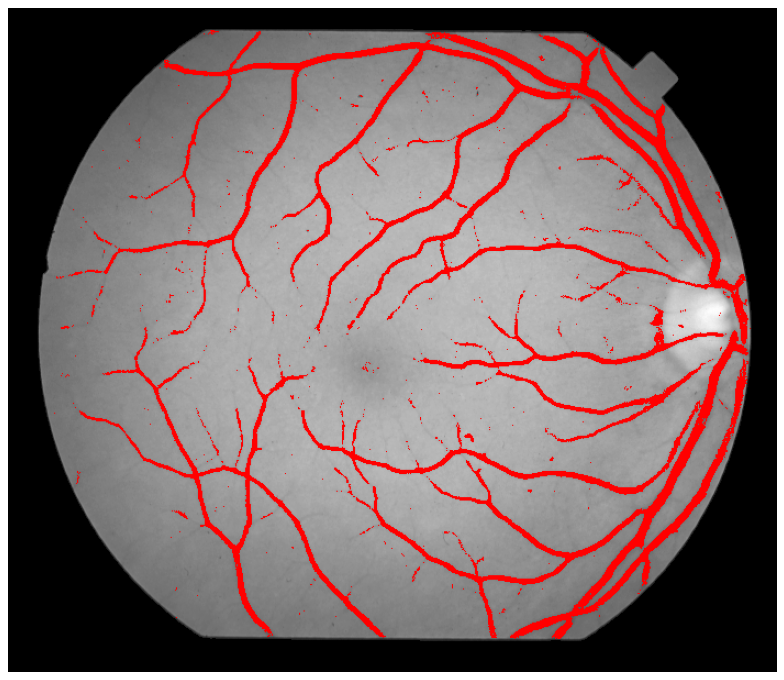

Accuracy score: 0.9602471672230957

F1 score: 0.8101981308411215

Confusion matrix:

     t/p    0.0   1.0 
      0.0 1118056 25878 
      1.0 24894 108364 
Sensivity: 0.8131894520404028
Specificity: 0.9773780655177658
Columns: Index([ 'Original_green_lbp_g',   '1:1_riu_green_lbp_g',
         '1:2_riu_green_lbp_g',   '1:4_riu_green_lbp_g',
         '1:8_riu_green_lbp_g', '2:1_1_riu_green_lbp_g',
       '2:1_2_riu_green_lbp_g', '2:1_3_riu_green_lbp_g',
       '2:1_4_riu_green_lbp_g',   '1:1_var_green_lbp_g',
         '1:2_var_green_lbp_g',   '1:4_var_green_lbp_g',
         '1:8_var_green_lbp_g', '2:1_1_var_green_lbp_g',
       '2:1_2_var_green_lbp_g', '2:1_3_var_green_lbp_g',
       '2:1_4_var_green_lbp_g',                       0,
                             1,                       2,
                             3,                       4,
                             5],
      dtype='object')


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


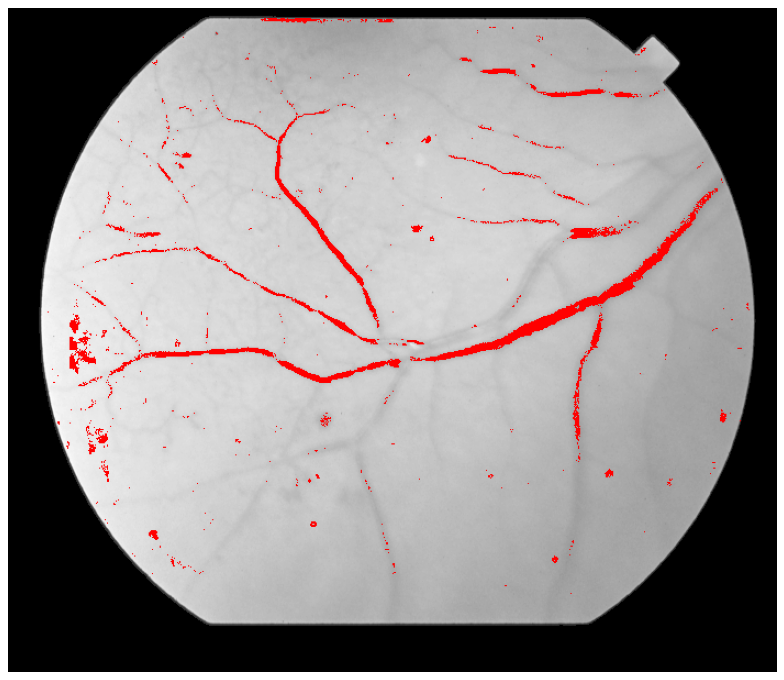

Accuracy score: 0.9340472462157566

F1 score: 0.6171083316653555

Confusion matrix:

     t/p    0.0   1.0 
      0.0 1098667 24747 
      1.0 57510 66287 
Sensivity: 0.5354491627422312
Specificity: 0.9779716115341273
Columns: Index([ 'Original_green_lbp_g',   '1:1_riu_green_lbp_g',
         '1:2_riu_green_lbp_g',   '1:4_riu_green_lbp_g',
         '1:8_riu_green_lbp_g', '2:1_1_riu_green_lbp_g',
       '2:1_2_riu_green_lbp_g', '2:1_3_riu_green_lbp_g',
       '2:1_4_riu_green_lbp_g',   '1:1_var_green_lbp_g',
         '1:2_var_green_lbp_g',   '1:4_var_green_lbp_g',
         '1:8_var_green_lbp_g', '2:1_1_var_green_lbp_g',
       '2:1_2_var_green_lbp_g', '2:1_3_var_green_lbp_g',
       '2:1_4_var_green_lbp_g',                       0,
                             1,                       2,
                             3,                       4,
                             5],
      dtype='object')


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


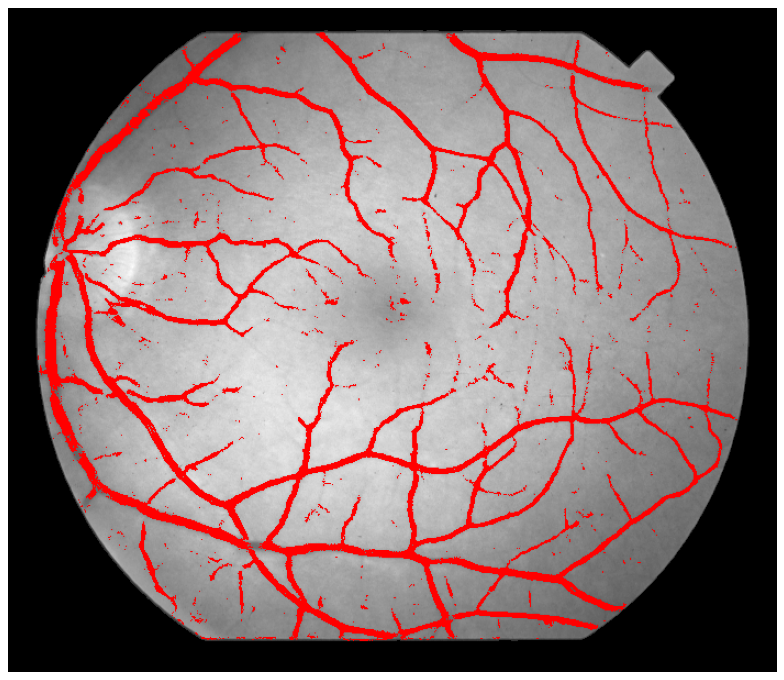

Accuracy score: 0.939993020765229

F1 score: 0.7109503605295495

Confusion matrix:

     t/p    0.0   1.0 
      0.0 1079761 34820 
      1.0 39982 91992 
Sensivity: 0.6970463879248943
Specificity: 0.9687595607676787
Columns: Index([ 'Original_green_lbp_g',   '1:1_riu_green_lbp_g',
         '1:2_riu_green_lbp_g',   '1:4_riu_green_lbp_g',
         '1:8_riu_green_lbp_g', '2:1_1_riu_green_lbp_g',
       '2:1_2_riu_green_lbp_g', '2:1_3_riu_green_lbp_g',
       '2:1_4_riu_green_lbp_g',   '1:1_var_green_lbp_g',
         '1:2_var_green_lbp_g',   '1:4_var_green_lbp_g',
         '1:8_var_green_lbp_g', '2:1_1_var_green_lbp_g',
       '2:1_2_var_green_lbp_g', '2:1_3_var_green_lbp_g',
       '2:1_4_var_green_lbp_g',                       0,
                             1,                       2,
                             3,                       4,
                             5],
      dtype='object')


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


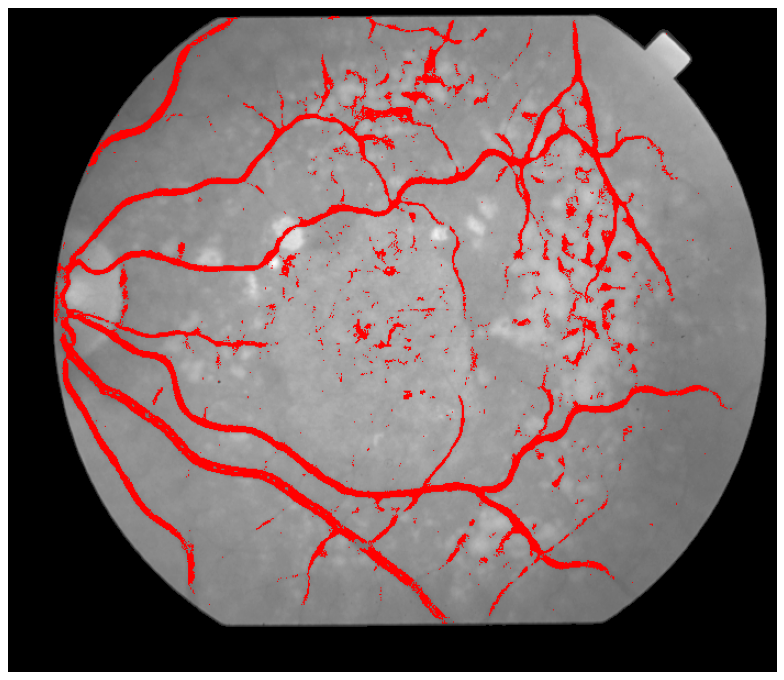

Accuracy score: 0.9431070653060311

F1 score: 0.670698806554464

Confusion matrix:

     t/p    0.0   1.0 
      0.0 1107159 22038 
      1.0 49123 72468 
Sensivity: 0.5959980590668718
Specificity: 0.9804834763110423
Columns: Index([ 'Original_green_lbp_g',   '1:1_riu_green_lbp_g',
         '1:2_riu_green_lbp_g',   '1:4_riu_green_lbp_g',
         '1:8_riu_green_lbp_g', '2:1_1_riu_green_lbp_g',
       '2:1_2_riu_green_lbp_g', '2:1_3_riu_green_lbp_g',
       '2:1_4_riu_green_lbp_g',   '1:1_var_green_lbp_g',
         '1:2_var_green_lbp_g',   '1:4_var_green_lbp_g',
         '1:8_var_green_lbp_g', '2:1_1_var_green_lbp_g',
       '2:1_2_var_green_lbp_g', '2:1_3_var_green_lbp_g',
       '2:1_4_var_green_lbp_g',                       0,
                             1,                       2,
                             3,                       4,
                             5],
      dtype='object')


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


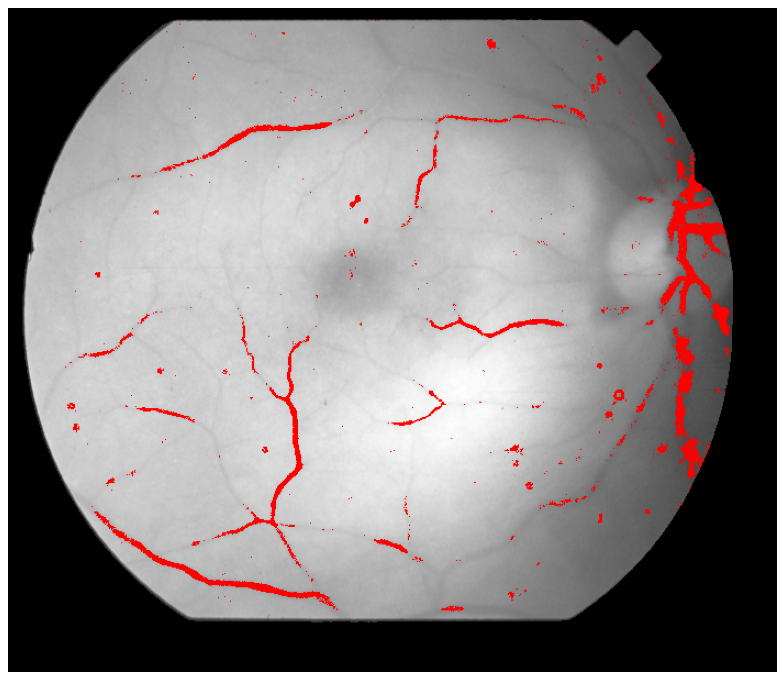

Accuracy score: 0.9454649601804713

F1 score: 0.7202403521208024

Confusion matrix:

     t/p    0.0   1.0 
      0.0 1089478 21852 
      1.0 46030 87381 
Sensivity: 0.6549759764936924
Specificity: 0.9803370735965015


In [5]:
from main import main
PARAMETERS.PLOT = True

for i in range(PARAMETERS.FOLDS):
    features = {
        'x_train': pd.concat([df_train_list[i], conv_features_list[i]], axis=1),
        'x_test': pd.concat([df_test_list[i], conv_features_test_list[i]], axis=1),
        #'x_train': pd.concat([df_train_list[i], pd.DataFrame()], axis=1),
        #'x_test': pd.concat([df_test_list[i], pd.DataFrame()], axis=1),
        'y_train': y_train_list[i],
        'y_test': y_test_list[i]
    }

    main(lgb='Num', features=features, plot_once=True, recurrence=True, fold=i)